### Imports

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
#imports
import scipy.io
import os
import pandas
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec
import obspy
import pywt
import pywt.data

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

### Load the trimmed data 

In [3]:
path_w = "/Users/ecem/Desktop/phonocardiogram/data/wavelet_deneme"
path = "/Users/ecem/Desktop/phonocardiogram/data/AV/absent"
waves = np.load(path + "/absent_AV_waves_10sec.npy", allow_pickle= True)

In [4]:
waves.shape

(6980, 40000)

## Let's look at wavelet decomposition for a signal piece

#### how our decomposition filter values look like

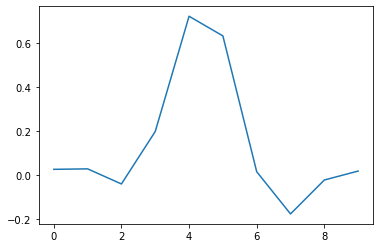

In [5]:
w = pywt.Wavelet('sym5')
plt.plot(w.dec_lo)
coeffs = pywt.wavedec(waves[0], w, level=6)

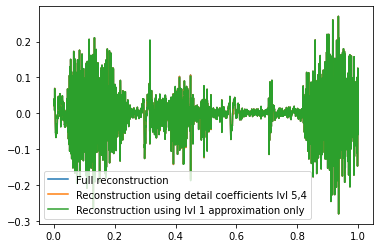

In [6]:
def reconstruction_plot(yyy, **kwargs):
    """Plot signal vector on x [0,1] independently of amount of values it contains."""
    plt.plot(np.linspace(0, 1, len(yyy)), yyy, **kwargs)

reconstruction_plot(pywt.waverec(coeffs, w)) # full reconstruction 
reconstruction_plot(pywt.waverec(coeffs[:-1] + [None] * 1, w)) # leaving out detail coefficients up to lvl 5
reconstruction_plot(pywt.waverec(coeffs[:-2] + [None] * 2, w)) # leaving out detail coefficients up to lvl 4
#reconstruction_plot(pywt.waverec(coeffs[:-3] + [None] * 3, w)) # leaving out detail coefficients up to lvl 3
#reconstruction_plot(pywt.waverec(coeffs[:-4] + [None] * 4, w)) # leaving out detail coefficients up to lvl 2
#reconstruction_plot(pywt.waverec(coeffs[:-5] + [None] * 5, w)) # leaving out detail coefficients up to lvl 1
#reconstruction_plot(pywt.waverec(coeffs[:-6] + [None] * 6, w)) # leaving out all detail coefficients = reconstruction using lvl1 approximation only
plt.legend(['Full reconstruction', 'Reconstruction using detail coefficients lvl 5,4', 'Reconstruction using lvl 1 approximation only'])

Amplitude of the coefficient corresponds to amplitude with which the wavelet occurs in the signal (y axis), and position of the coefficient corresponds to the time (x axis). 

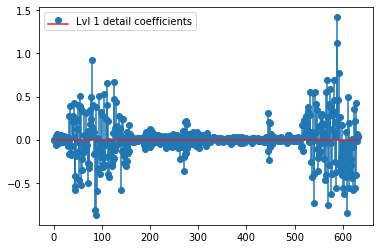

In [7]:
plt.stem(coeffs[1]); plt.legend(['Lvl 1 detail coefficients'])

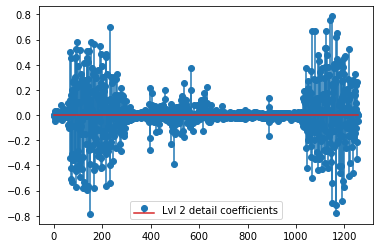

In [8]:
plt.stem(coeffs[2]); plt.legend(['Lvl 2 detail coefficients'])


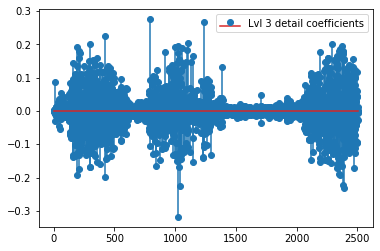

In [9]:
plt.stem(coeffs[3]); plt.legend(['Lvl 3 detail coefficients'])


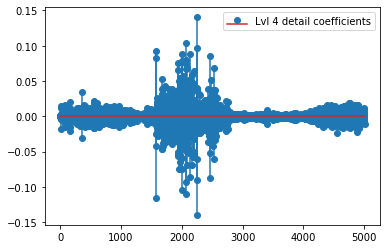

In [10]:
plt.stem(coeffs[4]); plt.legend(['Lvl 4 detail coefficients'])


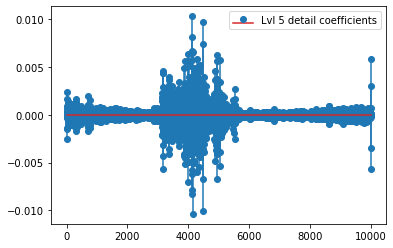

In [11]:
plt.stem(coeffs[5]); plt.legend(['Lvl 5 detail coefficients'])


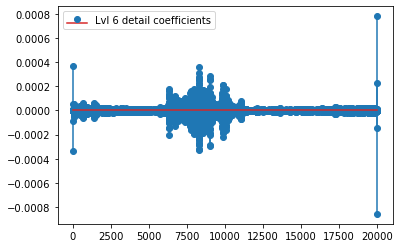

In [12]:
plt.stem(coeffs[6]); plt.legend(['Lvl 6 detail coefficients'])

In [13]:
# Reconstruction of signal using just lvl1 approximation
approx_lvl1 = pywt.waverec(coeffs[:-6] + [None] * 6, w)
# interpolate to original amount of samples (necessary due to numeric solution of transformation not yielding same amount of values)
approx_lvl1_interp = np.interp(x=np.arange(0, len(waves[0])), xp=np.linspace(0, 525, len(approx_lvl1)), fp=approx_lvl1)
x_without_lvl1approx = waves[0] - approx_lvl1_interp

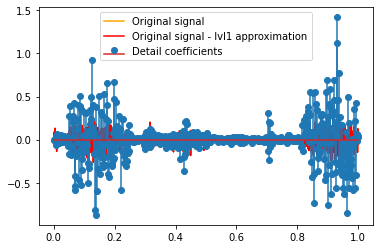

In [14]:
def reconstruction_stem(yyy, **kwargs):
    """Plot coefficient vector on x [0,1] independently of amount of values it contains."""
    plt.stem(np.linspace(0, 1, len(yyy)), yyy, **kwargs)

reconstruction_plot(waves[0], color='orange')
reconstruction_plot(x_without_lvl1approx, color='red')
reconstruction_stem(coeffs[1])
plt.legend(['Original signal', 'Original signal - lvl1 approximation', 'Detail coefficients'])

In [15]:
import pandas as pd

In [16]:
type(pywt.wavedec(waves[0], w, level=6))

list

In [17]:
coef = []
for i in range(len(waves)):
    coef.append(pywt.wavedec(waves[i], w, level=10))

In [18]:
for i in range(11):
    print(coef[0][i].shape)

(48,)
(48,)
(87,)
(165,)
(321,)
(633,)
(1258,)
(2508,)
(5007,)
(10006,)
(20004,)


In [19]:
coef[0]

[array([ 7.09958076e-01,  9.37440038e-01,  8.44011366e-01,  4.22953695e-01,
        -1.12747602e-01, -3.42661366e-02, -4.61424142e-03,  1.24890339e-02,
        -6.04568645e-02,  7.37407710e-03,  1.10778911e-02, -8.70479736e-03,
        -3.78184137e-03, -8.26059654e-03,  2.22282913e-02, -7.54859969e-02,
         1.23518333e-01, -1.05589844e-01,  1.82420947e-02,  4.46983762e-02,
        -7.35242618e-03,  2.26840784e-05,  1.36546828e-02,  3.12207192e-02,
        -3.53686698e-02,  7.37392381e-02, -5.65838069e-02,  1.60508260e-01,
        -2.48491112e-02,  8.76436234e-02,  2.87776403e-02,  7.48493224e-02,
         3.25020067e-02,  5.79657890e-02,  9.04133171e-02,  4.06181253e-02,
         4.69558872e-02,  7.67878629e-03,  8.26187432e-02, -7.18109729e-03,
         7.23647550e-02, -1.51321134e-02, -1.49407431e-01, -6.27818465e-01,
        -4.87663418e-01, -5.24536908e-01, -4.82097805e-01, -5.12566805e-01],
       dtype=float32),
 array([ 0.07909375,  0.07726558, -0.04261342,  0.08462285, -0.6

In [20]:
coef[1]

[array([-2.6127794e-01, -3.0921599e-01, -2.7539650e-01, -1.6514495e-01,
         8.4412552e-02, -7.1900673e-02,  5.1912639e-02, -1.6348775e-02,
        -3.3975770e-03,  4.2679802e-02, -4.8230838e-02,  1.1899908e-01,
        -1.3314027e-02,  5.8721170e-02,  3.9861266e-02,  3.3341501e-02,
         3.0048534e-02,  7.1077980e-02,  9.3145296e-03,  5.0918058e-02,
         5.3117257e-02, -4.7081973e-02,  1.6631238e-01, -4.2065233e-02,
         9.0200171e-02,  8.3970875e-02,  2.4197390e-02,  4.2940628e-02,
         8.3652779e-02, -4.8871427e-03,  6.0228363e-02,  3.3974208e-02,
        -7.3419355e-02,  1.5387055e-01, -1.1683393e-01,  2.3816407e-02,
         3.4877509e-02, -5.9417758e-02,  4.2865288e-02, -2.3573291e-02,
         1.3658409e-02,  2.1134154e-04, -1.0796231e-02, -5.5166993e-02,
        -4.3528318e-02, -3.6842644e-02, -4.4699382e-02, -4.4567071e-02],
       dtype=float32),
 array([-7.0917130e-02,  2.1393182e-02, -3.1321034e-02,  2.3796873e-02,
         1.4335653e-01,  3.3725370e-02, 

### Level by level

In [21]:
def level_coef_extractor_3d(array, lvl = 0):
    array =np.array(array)
    
    lenn = array[0][lvl].shape[0] #48
    coef = np.ones(shape = (array.shape[0],lenn)) #2392,48
    
    for i in range(array.shape[0]):
        coef[i,:] = array[i][lvl]
        
    return coef

In [22]:
def saver(array = 0, lvl = 0, dir_path = None, name = 'blank'):
    coefs = level_coef_extractor_3d(array, lvl)
    np.save(dir_path + "/"+ str(name) + "_lvl_"  + str(lvl), coefs, allow_pickle = True)
    del coefs

In [25]:
for i in range(7):
    saver(coef, i, path_w, 'absent_AV_wavelet_coef_deneme')


In [26]:
waves_ = np.load(path_w + "/absent_AV_wavelet_coef_deneme_lvl_0.npy",  allow_pickle = True)

In [27]:
waves.shape

(6980, 40000)

In [28]:
waves[0]

array([ 0.02140091,  0.02267499,  0.02397811, ..., -0.01884388,
       -0.01579442, -0.01284505], dtype=float32)

In [29]:
waves[10]

array([ 1.1715358e-02,  8.5145272e-03,  7.7912873e-03, ...,
        7.8343379e-05, -9.4659757e-05,  0.0000000e+00], dtype=float32)